<a href="https://colab.research.google.com/github/Haniaakanwal/DIP-TASK/blob/main/Dip_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Libraries imported successfully!")


Libraries imported successfully!


In [5]:
# Upload image from local system
uploaded = files.upload()
image_name = list(uploaded.keys())[0]
print("Uploaded Image:", image_name)


Saving task-9.jpg to task-9.jpg
Uploaded Image: task-9.jpg


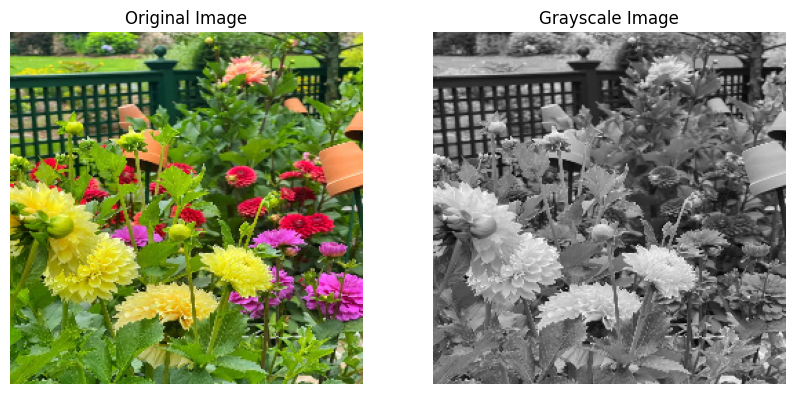

In [6]:
# Load original image
image = cv2.imread(image_name)
image = cv2.resize(image, (256, 256))  # Resize for faster processing

# Convert to RGB for displaying correctly in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display original and grayscale images side-by-side
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.show()


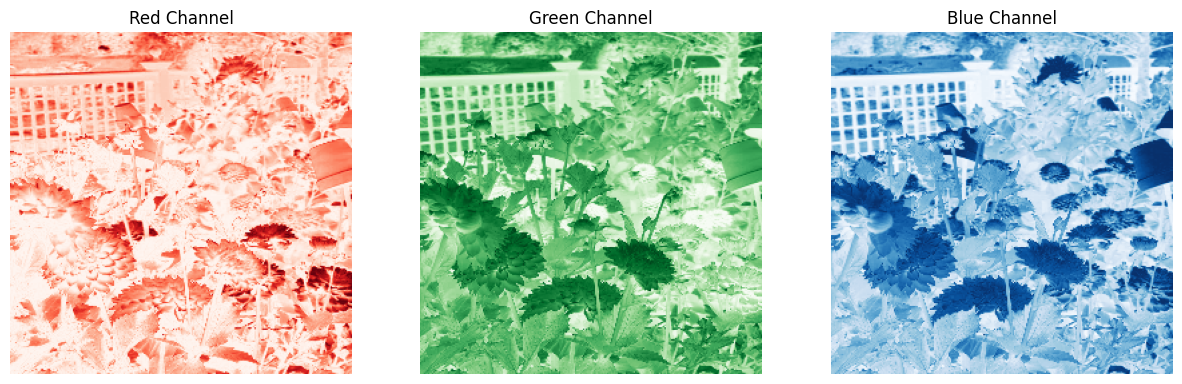

In [8]:
# Split channels
R, G, B = cv2.split(image)

# Display RGB channels
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(R, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(G, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(B, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")

plt.show()


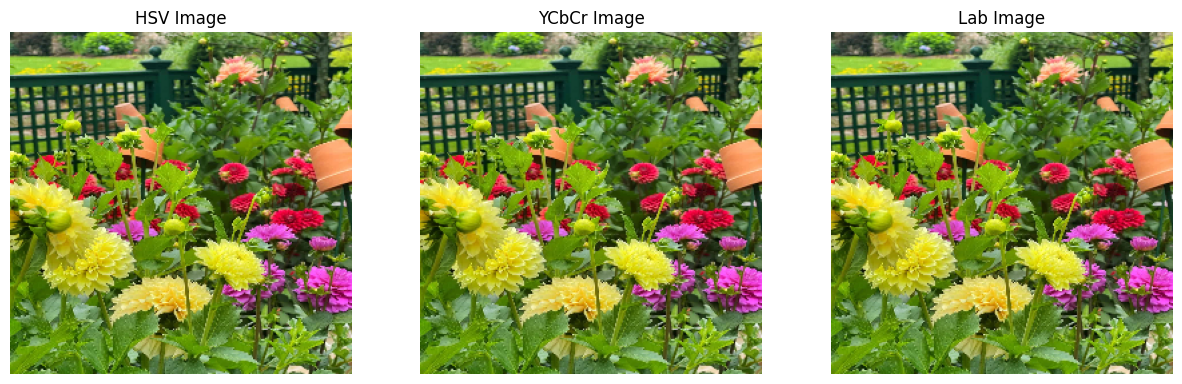

In [9]:
# Convert to HSV, YCbCr, Lab
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
ycbcr = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Display different color spaces
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
plt.title("HSV Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(ycbcr, cv2.COLOR_YCrCb2RGB))
plt.title("YCbCr Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(lab, cv2.COLOR_Lab2RGB))
plt.title("Lab Image")
plt.axis("off")

plt.show()


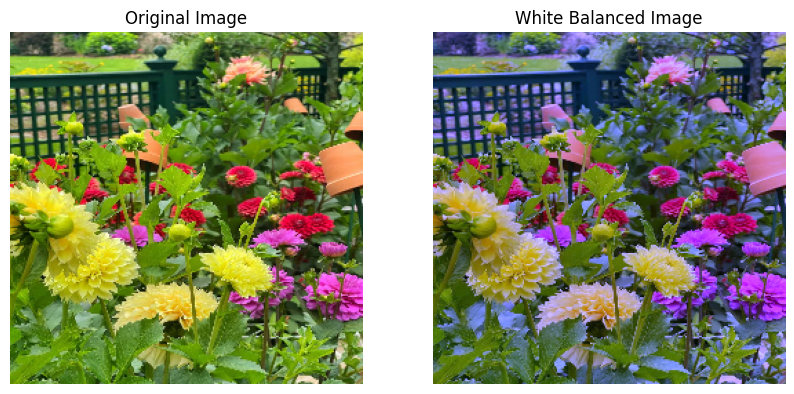

In [10]:
def gray_world_white_balance(img):
    # Split channels
    B, G, R = cv2.split(img.astype(np.float32))

    # Compute average of each channel
    avgR = np.mean(R)
    avgG = np.mean(G)
    avgB = np.mean(B)
    avgGray = (avgR + avgG + avgB) / 3

    # Scale channels
    R = np.clip(R * (avgGray / avgR), 0, 255)
    G = np.clip(G * (avgGray / avgG), 0, 255)
    B = np.clip(B * (avgGray / avgB), 0, 255)

    wb_img = cv2.merge([B, G, R]).astype(np.uint8)
    return wb_img

wb_image = gray_world_white_balance(image)

# Display
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(wb_image, cv2.COLOR_BGR2RGB))
plt.title("White Balanced Image")
plt.axis("off")

plt.show()


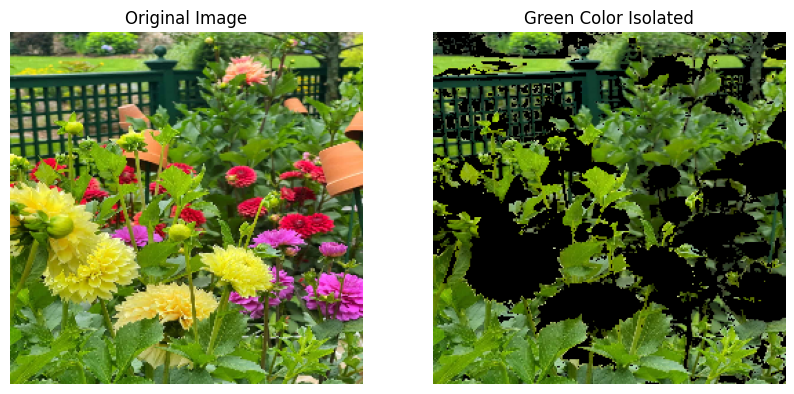

In [11]:
# Convert to HSV
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define green color range
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Create mask
mask_green = cv2.inRange(hsv_img, lower_green, upper_green)

# Apply mask
green_isolated = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_green)

# Display
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(green_isolated)
plt.title("Green Color Isolated")
plt.axis("off")

plt.show()


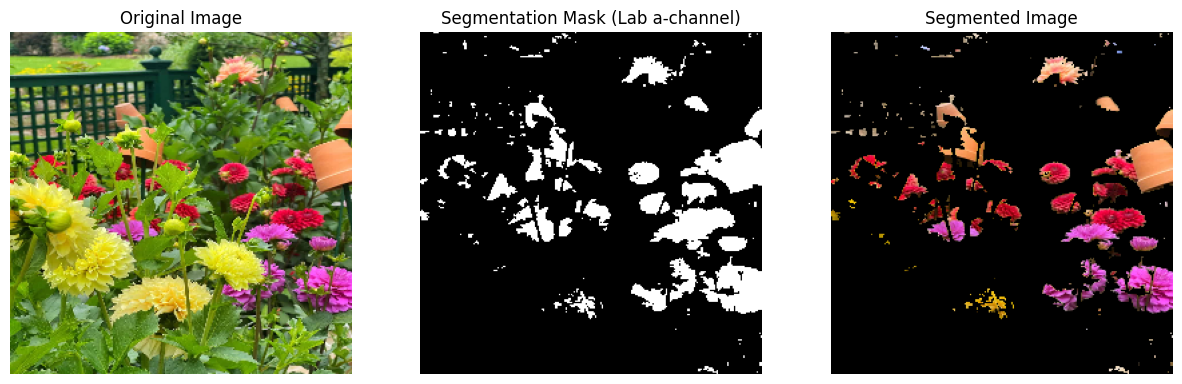

In [12]:
# Convert to Lab
lab_img = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
L, a, b = cv2.split(lab_img)

# Apply thresholding on 'a' channel (red-green)
_, seg_mask = cv2.threshold(a, 128, 255, cv2.THRESH_BINARY)

# Apply mask to original image
segmented_img = cv2.bitwise_and(image_rgb, image_rgb, mask=seg_mask)

# Display
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(seg_mask, cmap='gray')
plt.title("Segmentation Mask (Lab a-channel)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.axis("off")

plt.show()
